# Fine-tuning YOLOv8 fire detection


In [1]:
!pip install ultralytics

In [3]:
import os
#from google.colab import files
import zipfile
import yaml
from ultralytics import YOLO
import matplotlib.pyplot as plt
import torch

In [ ]:
# # Upload du fichier zip
# uploaded = files.upload()
# zip_path = list(uploaded.keys())[0]

# # Décompression dans 'datasets'
# extract_dir = "/home/nabil_simplon/wildfire-detection/.zip"
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#    zip_ref.extractall(extract_dir)


Saving .zip to .zip (1)


## test with data augmentation 

In [4]:

yaml_path = "../dataset/data.yaml"
# Charger le modèle que vous souhaitez
model = YOLO("yolov8n.pt")

results = model.train(
    data=yaml_path,    # fichier yaml qui décrit train/val/test et classes
    epochs=50,         # nombre d’époques (à adapter, souvent 50-100)
    batch=16,          # taille de batch (en fonction de la mémoire GPU)
    imgsz=640,         # taille d’entrée des images
    save_period=5,     # sauvegarde tous les 5 epochs
    project="../runs/train_with_aug", # dossier de sortie
    name="exp1",       # nom de l’expérience
    exist_ok=True, # écrase si le dossier existe déjà
    augment=True      # enable built-in augmentation
)


Ultralytics 8.3.203 🚀 Python-3.13.5 torch-2.8.0 CPU (Apple M4 Pro)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=../dataset/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=exp1, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profil

   epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   74.146         2.06006         3.45311         1.98562   
1      2  149.034         1.79634         2.90377         1.77647   
2      3  224.154         1.80244         2.75183         1.77380   
3      4  299.126         1.88733         2.69436         1.86837   
4      5  374.586         1.85048         2.55834         1.82321   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.00859            0.59585           0.11345   
1               0.00651            0.46114           0.05414   
2               0.22849            0.11917           0.08742   
3               0.09568            0.13990           0.05584   
4               0.05371            0.21244           0.05840   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.06268       1.63443       3.72064       1.88564  0.000350   
1              0.02624       2.01674       3

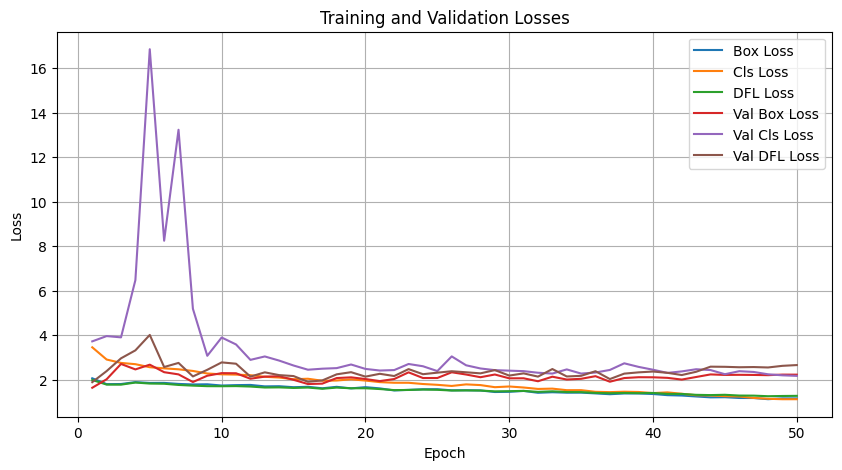

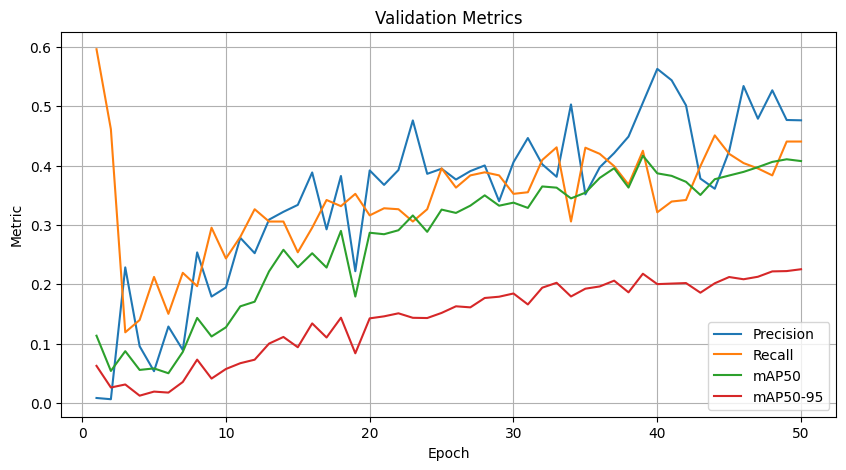

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt

# Path to the results.csv 
csv_path = "../runs/train_with_aug/exp1/results.csv"

# Load CSV file
df = pd.read_csv(csv_path)

# Show first rows
print(df.head())

# --------- Plot Losses ----------
plt.figure(figsize=(10,5))
plt.plot(df['epoch'], df['train/box_loss'], label='Box Loss')
plt.plot(df['epoch'], df['train/cls_loss'], label='Cls Loss')
plt.plot(df['epoch'], df['train/dfl_loss'], label='DFL Loss')
plt.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss')
plt.plot(df['epoch'], df['val/cls_loss'], label='Val Cls Loss')
plt.plot(df['epoch'], df['val/dfl_loss'], label='Val DFL Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Losses")
plt.legend()
plt.grid(True)
plt.show()

# --------- Plot Metrics ----------
plt.figure(figsize=(10,5))
plt.plot(df['epoch'], df['metrics/precision(B)'], label='Precision')
plt.plot(df['epoch'], df['metrics/recall(B)'], label='Recall')
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP50')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP50-95')
plt.xlabel("Epoch")
plt.ylabel("Metric")
plt.title("Validation Metrics")
plt.legend()
plt.grid(True)
plt.show()


---